# Modèle de classification des textos en spam

Dans ce cas pratique on cherche à entraîner un modèle capable de prédire si un texto est un spam ou non. On s'appuie pour cela sur une base de données contenant des sms labellisés comme spam ou non spam (trouvée sur https://archive.ics.uci.edu/ml/datasets.php, voir readme pour plus d'informations).  

- Importez la base de données dans un dataframe 

In [4]:
import pandas as pd
df_sms = pd.read_table("smsspamcollection/SMSSpamCollection.txt", header = None)
df_sms.columns = ["statut", "texte"]

In [5]:
df_sms.head()

,statut,texte
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Appliquez les transformations usuelles du texte pour faciliter l'analyse textuelle

In [6]:
import re
import string

# On crée une fonction qu'on appliquera à l'ensemble des lignes
def nettoyage(text):
    text = text.lower() # passage en minuscules
    text = re.sub("\d", "", text) # On enlève les chiffres
    # on n'enlève pas la ponctuation, qui est traitée par CountVectorizer()  
    return text
df_sms_clean = pd.DataFrame(df_sms.texte.apply(lambda x: nettoyage(x)))

- Faites une matrice de termes et affichez les termes les plus fréquents dans chaque catégorie : spam ou non spam. Si nécessaire, enrichissez la liste de stop-words pour limiter la taille de la matrice.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = "english")

# On fit_transform 
mdt = cv.fit_transform(df_sms_clean.texte)
mdt_textos_all = pd.DataFrame(mdt.toarray(), columns = cv.get_feature_names())
mdt_textos_all.index = df_sms.statut
mdt_textos_all

,____,aa,aah,aaniye,aaooooright,aathi,ab,abbey,abdomen,abeg,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zs,zyada,èn,〨ud
statut,,,,,,,,,,,,,,,,,,,,,
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# Beaucoup de colonnes, voyons ce qu'on peut nettoyer...

# On somme les termes par spam ou ham
sum_mots = mdt_textos_all.groupby("statut").sum()
sum_mots_t = sum_mots.transpose()
sum_mots_t

statut,ham,spam
____,2,0
aa,1,0
aah,3,0
aaniye,1,0
aaooooright,1,0
...,...,...
zouk,0,1
zs,0,1
zyada,1,0
èn,1,0


In [9]:
# On peut supprimer quand le nombre d'occurences représente moins de 1% des observations
nb_occurences = pd.DataFrame()
for i in ["ham", "spam"]:
    nb_occurences[i] = sum_mots_t[i]/len(mdt_textos_all[mdt_textos_all.index == i]) 

part_occu_max = nb_occurences.max(axis = 1)
        

In [10]:
additional_sw = part_occu_max[part_occu_max<=0.01].index.values
list_sw = []
for i in additional_sw:
    list_sw.append(i)
additional_sw

array(['____', 'aa', 'aah', ..., 'zyada', 'èn', '〨ud'], dtype=object)

In [11]:
# On fait une liste avec les stop words usuels et ceux qu'on a choisis
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer


# ajout de nos nouveaux stop words
stop_words = text.ENGLISH_STOP_WORDS.union(additional_sw)
stop_words

frozenset({'individual',
           'aspects',
           'overdid',
           'betta',
           'brings',
           'app',
           'prayrs',
           'infra',
           'personal',
           'cashto',
           'cam',
           'fees',
           'forum',
           'swann',
           'visiting',
           'lost',
           'brilliantly',
           'settings',
           'himso',
           'hvd',
           'supposed',
           'beach',
           'drunken',
           'wondarfull',
           'quizclub',
           'rolled',
           'nearby',
           'assume',
           'ladies',
           'yhl',
           'prix',
           'perfect',
           'removed',
           'mindset',
           'gm',
           'remembered',
           'msn',
           'format',
           'laying',
           'steamboat',
           'recreation',
           'mandy',
           'soo',
           'converter',
           'mumbai',
           'brandy',
           'stream',
     

In [14]:
cv = CountVectorizer(stop_words = stop_words)
# On refait la matrice de distances ainsi : 
mdt = cv.fit_transform(df_sms_clean.texte)
mdt_textos = pd.DataFrame(mdt.toarray(), columns = cv.get_feature_names())
mdt_textos.index = df_sms.statut
mdt_textos

,ac,account,admirer,age,amp,answer,anytime,apply,area,ask,...,word,work,worth,www,xmas,xxx,ya,yeah,yes,yr
statut,,,,,,,,,,,,,,,,,,,,,
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
spam,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spam,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ham,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Termes les plus fréquents pour spam ou non spam : 
spam = sum_mots_t[["spam"]]
non_spam = sum_mots_t[["ham"]]

In [16]:
# Les 20 mots les plus courants pour les spams
spam.sort_values(by='spam', ascending = False).head(20)

statut,spam
free,226
txt,170
ur,144
mobile,128
stop,126
text,126
claim,113
reply,104
www,98
prize,93


In [17]:
# Les 20 mots les plus courants pour les non-spams
non_spam.sort_values(by='ham', ascending = False).head(20)

statut,ham
gt,318
lt,316
just,297
ok,288
ll,266
ur,247
know,237
good,235
like,234
got,234


Plutôt positif : les noms les plus communs sont très différents selon les catégories

- Faites un nuage de mots par catégorie pour bien illustrer les différences des mots utilisés entre spam et non spam.

In [136]:
# on met les textes spam et non spams ensemble
dict_spam_ham = {}
for i in ["ham", "spam"]:
    dict_spam_ham[i] = ''.join(df_sms_clean.texte[df_sms.statut == i])
dict_spam_ham

{'ham': 'go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat...ok lar... joking wif u oni...u dun say so early hor... u c already then say...nah i don\'t think he goes to usf, he lives around here thougheven my brother is not like to speak with me. they treat me like aids patent.as per your request \'melle melle (oru minnaminunginte nurungu vettam)\' has been set as your callertune for all callers. press * to copy your friends callertunei\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? i\'ve cried enough today.i\'ve been searching for the right words to thank you for this breather. i promise i wont take your help for granted and will fulfil my promise. you have been wonderful and a blessing at all times.i have a date on sunday with will!!oh k...i\'m watching here:)eh u remember how  spell his name... yes i did. he v naughty make until i v wet.fine if that\x92s the way u feel. that\x92s the way

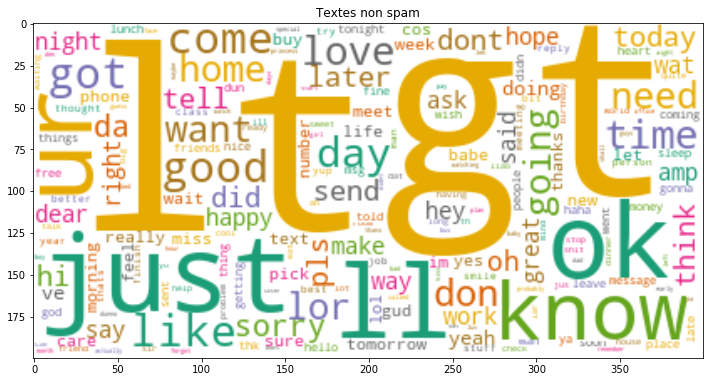

In [137]:
# Wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

wc.generate_from_frequencies(non_spam.ham)

plt.imshow(wc, interpolation="bilinear")
plt.title("Textes non spam")
plt.rcParams["figure.figsize"] = (12,12)
plt.show()

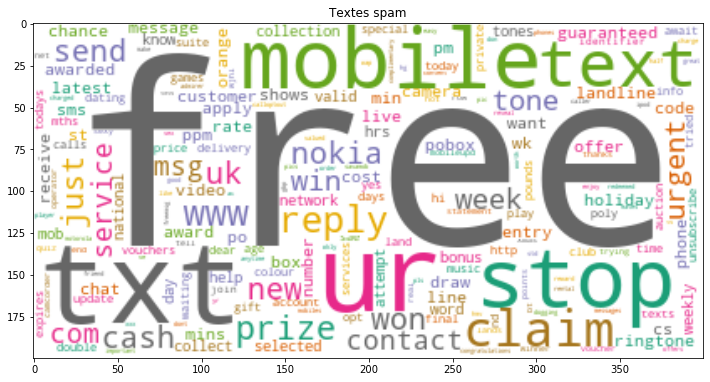

In [138]:
wc.generate_from_frequencies(spam.spam)

plt.imshow(wc, interpolation="bilinear")
plt.title("Textes spam")
plt.rcParams["figure.figsize"] = (12,12)
plt.show()

- À partir de la matrice de termes réduite, entraînez un modèle de forêts aléatoires permettant de prédire si un texto est un spam ou non 

In [21]:
# On splite notre matrice en entraînement et test
from sklearn.model_selection import train_test_split
y = 1 * (mdt_textos.index == "spam")

X_train, X_test, y_train, y_test = train_test_split(mdt_textos, y, test_size=0.2)
X_train.shape, y_train.shape

((4457, 349), (4457,))

In [22]:
# On entraîne le modèle de randomforest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
# on affiche le score
rf.score(X_test, y_test)

0.9766816143497757

On fait la matrice de confusion pour vérifier la qualité de notre modèle : 

In [144]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, rf.predict(X_test))
cm = pd.DataFrame(cm, columns=["Prédit non spam", "Prédit spam"])
cm.index = ["Vrai non spam", "Vrai spam"]
cm

,Prédit non spam,Prédit spam
Vrai non spam,964,3
Vrai spam,20,128


### - Essayez d'améliorer la prédiction de votre modèle en ajoutant une analyse en composantes principales en amont.

In [28]:
# On entraîne notre ACP
from sklearn.decomposition import PCA
pca = PCA(0.60)
pca.fit(X_train)
pca.n_components_ # on affiche le nombre de composantes

56

In [29]:
# on transforme nos X train et X test
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [30]:
# On entraîne le modèle de randomforest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestClassifier()
rf.fit(X_train_pca, y_train)
# on affiche le score
rf.score(X_test_pca, y_test)

0.97847533632287

On trouve une prédiction au moins aussi bonne en ne conservant que 60% de la variance. 

On peut imaginer que pour une entreprise qui développe cette solution, on souhaite plus à minimiser l'erreur consistant à définir comme spam un texto qui n'en est pas un (erreur de type 1, "faux positif") plutôt que de rater quelques spams : 
- Utilisez votre dernier modèle pour prédire des probabilités que le texto soit un spam. À partir de quelle valeur de cette probabilité notre modèle ne classe aucun non spam en spam?

In [32]:
predictions = rf.predict_proba(X_test_pca)
predictions

array([[2.60000000e-01, 7.40000000e-01],
       [9.89444444e-01, 1.05555556e-02],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [9.98823529e-01, 1.17647059e-03],
       [9.99981308e-01, 1.86915888e-05],
       [9.90000000e-01, 1.00000000e-02]])

In [31]:
# Le nombre d'erreurs de type 1 en fonction d'un seuil de décision se fixe ainsi :  
predictions = rf.predict_proba(X_test_pca)
y_pred = 1 * (predictions[:, 1] > 0.80)
erreur_type_1 = y_pred[y_test == 0].sum()
erreur_type_1

0

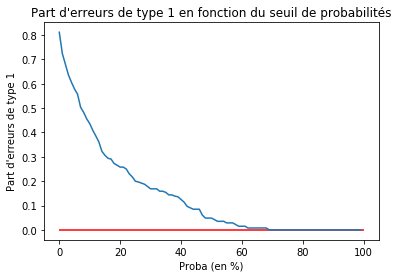

In [33]:
# On fait un graphe pour voir à quel niveau on ne prédit plus un spam à tort
proba = [i for i in range(0, 100, 1)]
import matplotlib.pyplot as plt

# On en profite pour calculer aussi les erreurs de type 2 : les faux négatifs, c'est à dire les spams prédits comme non spams
erreur_type_1 = []
erreur_type_2 = []
for i in proba:
    y_pred = 1 * (predictions[:, 1] > i/100)
    erreur_type_1.append(y_pred[y_test == 0].sum()/(y_pred == 1).sum())
    erreur_type_2.append(y_test[y_pred == 0].sum()/(y_pred == 0).sum())
    
plt.plot(proba, erreur_type_1)
plt.xlabel("Proba (en %)")
plt.ylabel("Part d'erreurs de type 1")
plt.title("Part d'erreurs de type 1 en fonction du seuil de probabilités")
plt.hlines(y = 0, xmin = 0, xmax = 100, color = "red")
plt.show()

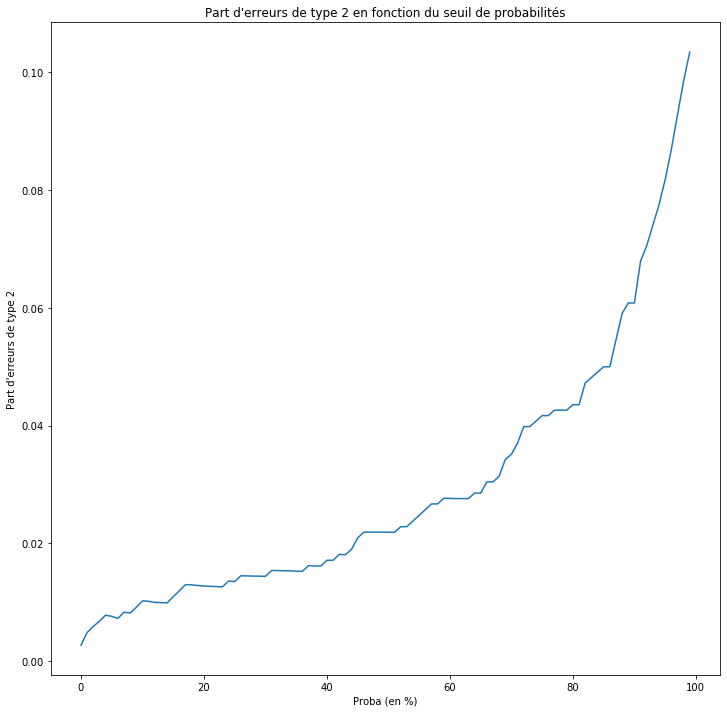

In [97]:
plt.plot(proba, erreur_type_2)
plt.xlabel("Proba (en %)")
plt.ylabel("Part d'erreurs de type 2")
plt.title("Part d'erreurs de type 2 en fonction du seuil de probabilités")
plt.show()

## Courbe ROC

On peut voir ce qu'on perd en précision de prédiction lorsqu'on minimise l'erreur de type 1 avec la courbe ROC (voir votre cours avec Louis `La régression logistique_ROC_AUC`) :

In [98]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr0, tpr0, thresholds0 = roc_curve(y_test, predictions[:, 1], pos_label=rf.classes_[1], 
                                    drop_intermediate=False)

In [103]:
tp = pd.DataFrame(dict(taux_faux_spams=fpr0, taux_vrais_spams=tpr0, threshold=thresholds0)).copy()
tp.drop(0, axis=0, inplace=True) #suppression du 1er seuil fixé arbitrairement à 2
tp

,taux_faux_spams,taux_vrais_spams,threshold
1,0.000000,0.102362,1.000000
2,0.000000,0.149606,0.990000
3,0.000000,0.204724,0.980000
4,0.000000,0.259843,0.970000
5,0.000000,0.299213,0.960000
...,...,...,...
241,0.621457,0.992126,0.000036
242,0.622470,0.992126,0.000034
243,0.623482,0.992126,0.000019
244,0.628543,0.992126,0.000018


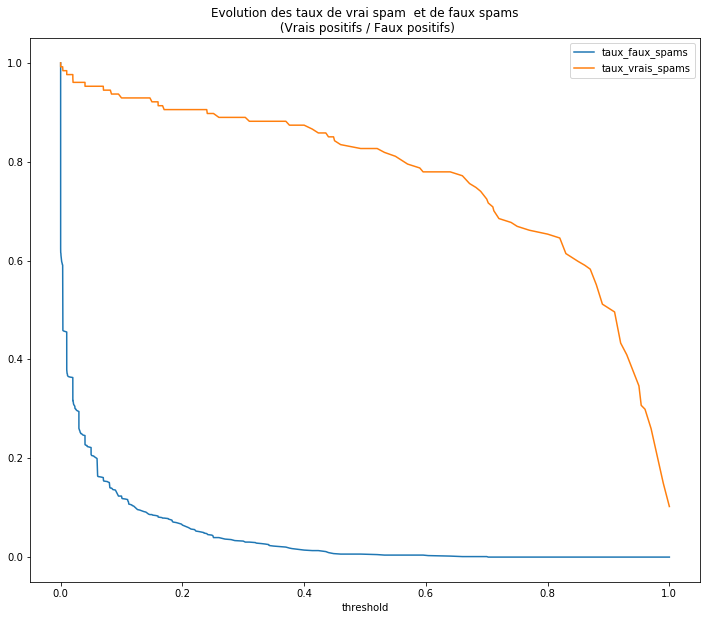

In [105]:
ax = tp.plot(x="threshold", y=['taux_faux_spams', 'taux_vrais_spams'], figsize=(12,10))
ax.set_title("Evolution des taux de vrai spam  et de faux spams\n (Vrais positifs / Faux positifs)");